In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, ode

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
pd.set_option('display.max_columns', 50)
%config IPCompleter.greedy=True

Initial guesses converged after 1 tries.


/home/peter/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


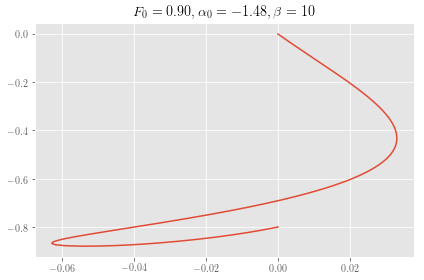

In [98]:
SRESOLUTION = 100

def get_end_point( F0, alfa0, beta):
    """Integrates based on given initial conditions and beta.
    Returns array Faxy."""
    initial = [F0, alfa0, 0, 0]
    def odes(s, arej, beta):
        F, alfa, x, y = arej
        Fpika = - beta*x*np.cos(alfa) + np.sin(alfa)
        alfapika = (beta*x*np.sin(alfa) + np.cos(alfa))/F
        xpika = np.cos(alfa)
        ypika = np.sin(alfa)
        return [Fpika, alfapika, xpika, ypika]
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, 0).set_f_params(beta)
    return r.integrate(1)
def get_trajectory(F0, alfa0, beta):
    """Integrates based on given initial conditions and beta.
    Returns trajectory Faxy."""
    initial = [F0, alfa0, 0, 0]
    def odes(s, arej, beta):
        F, alfa, x, y = arej
        Fpika = - beta*x*np.cos(alfa) + np.sin(alfa)
        alfapika = (beta*x*np.sin(alfa) + np.cos(alfa))/F
        xpika = np.cos(alfa)
        ypika = np.sin(alfa)
        return [Fpika, alfapika, xpika, ypika]
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, 0).set_f_params(beta)
    ss = np.linspace(0,1, 200)
    sol = np.zeros((ss.shape[0],4))
    for i, t in enumerate(ss):
        sol[i,:] = r.integrate(t)
    return sol
def shoot(beta, y_final):
    """For a given beta and y_final finds initial conditions
    of F0 and alfa0 and promplty returns them, if found, else None."""
    def _fun_to_minimize(arej, beta, y_final):
        F0, alfa0 = arej
        xy = get_end_point(F0, alfa0, beta)[-2:]
        xf, yf = xy[0], xy[1]
        return [xf, yf-y_final]
    from scipy.optimize import root
    for bleh in range(100):
        rez = root(_fun_to_minimize, [np.random.rand(), np.random.rand()*np.pi*2], args=(beta, y_final))
        if rez.success:
            print(f"Initial guesses converged after {bleh+1} tries.")
            return rez.x
beta = 10
y_final = -0.8
rez = shoot(beta, y_final)
trajektorija = get_trajectory(rez[0], rez[1], beta)
fig, ax = plt.subplots()
ax.set_title(fr"$F_0={{{rez[0]:0.2f}}}, \alpha_0={{{rez[1]:0.2f}}}, \beta={{{beta}}}$")
ax.plot(trajektorija[:,2], trajektorija[:,3])
#ax.set_aspect('equal')
plt.savefig("2020-1-trajektorija8.pdf")
plt.show()

In [64]:
np.random.rand()

0.4215769636782304